<a href="https://colab.research.google.com/github/shiv9thakur/sarcasm_detection/blob/main/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detection

## Motivation

There is a Character Dr. Sheldon Lee Cooper-in a sitcom The Big Bang Theory- who can't get hold of sarcasm and is always taking it in a literal way. I had an understanding that sarcasm does have a learning curve to go through in order to get a hold of it and hence have attempted to rectify his problem.

## Application

Is not understanding sarcasm a ‘big deal’? Turns out it is because it is so prevalent, and not understanding it makes you stand out.

Someone once said that ‘sarcasm is a metric for potential.’ Often at times, this is one of the hardest struggles for those with autism growing up.A lack of sarcasm is often one of the most common characteristics of struggling with an autism diagnosis along with things such as social and communication issues, difficulties reading body language, using different tones in their voices, and many more. This results in them feeling separated from the conversations and hence feel left out. The model is an attempt to be at service of those and can further be used to help understand other expressions hidden in a person's statement.



## Data

The data being used is otbained from kaggle.

https://www.kaggle.com/theynalzada/news-headlines-for-sarcasm-detection

There is still a strong need to acquire a bigger dataset to give adequate training to the model being generated. The data is also just from news headlines and hence can be further diversified to movie dialogues, reviews and songs to get improve data quality and ad features such as tone.

## Data Cleaning


Importing Libraries

In [3]:
!pip3 install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.2 MB/s 


In [4]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Sarcasm_Data.csv")

In [6]:
df.shape

(12506, 2)

In [7]:
df.sample(5)

,headlines,target
7340,WATCH: Nancy Grace Fights With Weatherman,Non Sarcastic
3732,President Donald Trump’s White House Speech Co...,Non Sarcastic
1496,Shrimp Boat Captain Worn Out From Long Day Of ...,Sarcastic
12272,FBI Launches Nationwide Manhunt For New Office...,Sarcastic
11722,Historical Archives: Hy-Genic Apportionment Of...,Sarcastic


In [6]:
df.dtypes

headlines    object
target       object
dtype: object

In [7]:
df.headlines[0]  

'CNN Triumphs (At Least in Most Demographic Categories)'

In [8]:
#Checking value count
df.groupby('target').describe()

headlines  ...     
                  count  ... freq
target                   ...     
Non Sarcastic      6531  ...    1
Sarcastic          5975  ...    1

[2 rows x 4 columns]

In [13]:
print(6531/12506)

0.5222293299216376


**Since the data is almost evenly split (52-48). We do not have to deal with imbalanced dataset**

Converting the categorical classification to numerical one.

In [8]:
df['target'] = df['target'].apply(lambda x: 1 if x == 'Sarcastic' else 0)
df.sample(5)

,headlines,target
10222,Haiti gang leader threatens to kill kidnapped ...,0
9439,6 Ideas That Could Lead to More Bipartisan Pol...,0
2459,Anderson Cooper Throws Another Box Of Letters ...,1
6806,Mic Snatched From Kamala,0
2982,George Conway Puts Trump's Senate Enablers On ...,0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['headlines'], df['target'],  stratify=df['target'])

In [10]:
X_train.head(4)

8681    CNN Debate Moderators Used Conservative Framin...
974     Americans Confused By System Of Government In ...
8523    Chris Cuomo Makes Heartfelt Plea To End The St...
528     Jonathan Safran Foer Guesses It’s Time To Give...
Name: headlines, dtype: object

In [11]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [12]:
def get_sentence_embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

In [13]:
# Checking the function

get_sentence_embedding(['The Steep Distortion Curve of Republican Populism'])

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.8698286 , -0.41606644, -0.8271835 ,  0.7945703 ,  0.46936825,
        -0.1412743 ,  0.7746808 ,  0.26347646, -0.7824964 , -0.99993634,
        -0.6477764 ,  0.9575048 ,  0.98209786,  0.52242035,  0.8941726 ,
        -0.75080633, -0.58889407, -0.5273328 ,  0.22972739, -0.5284381 ,
         0.73756486,  0.99992484, -0.32898495,  0.34231368,  0.38269347,
         0.98451036, -0.79683125,  0.8908815 ,  0.94265103,  0.7644203 ,
        -0.64945966,  0.28950593, -0.9889258 , -0.0729803 , -0.8992652 ,
        -0.99147314,  0.41241515, -0.5549161 ,  0.16965209,  0.07071544,
        -0.8465491 ,  0.22044787,  0.99986655,  0.09474771,  0.57809025,
        -0.12308016, -0.9999994 ,  0.21891227, -0.83998793,  0.91365427,
         0.8545129 ,  0.91818225,  0.15173788,  0.478646  ,  0.39281487,
        -0.53587234, -0.03447785,  0.12179507, -0.23888916, -0.4842722 ,
        -0.5343158 ,  0.5266392 , -0.8069091 , -0.85811   ,  0.9137381 ,
 

## Bluiding Model

Here a functional model is being build

In [14]:
# Bert Layers
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural Network Layers
layer = tf.keras.layers.Dropout(0.1, name = "dropout")(outputs['pooled_output'])
layer = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(layer)

#Constructing final model using the inputs and outputs
model = tf.keras.Model(inputs = [text_input], outputs = [layer])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [16]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
]

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=METRICS)

## Train the model

In [17]:
model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
294/294 [==============================] - 195s 623ms/step - loss: 0.6486 - accuracy: 0.6202 - precision: 0.6110 - recall: 0.5646
Epoch 2/15
294/294 [==============================] - 184s 625ms/step - loss: 0.5512 - accuracy: 0.7479 - precision: 0.7567 - recall: 0.6963
Epoch 3/15
294/294 [==============================] - 184s 625ms/step - loss: 0.5044 - accuracy: 0.7771 - precision: 0.7855 - recall: 0.7338
Epoch 4/15
294/294 [==============================] - 183s 624ms/step - loss: 0.4805 - accuracy: 0.7881 - precision: 0.7942 - recall: 0.7512
Epoch 5/15
294/294 [==============================] - 183s 623ms/step - loss: 0.4536 - accuracy: 0.8074 - precision: 0.8124 - recall: 0.7762
Epoch 6/15
294/294 [==============================] - 184s 626ms/step - loss: 0.4424 - accuracy: 0.8050 - precision: 0.8052 - recall: 0.7806
Epoch 7/15
294/294 [==============================] - 184s 626ms/step - loss: 0.4350 - accuracy: 0.8069 - precision: 0.8079 - recall: 0.7817
Epoch 8/15
29

In [18]:
model.evaluate(X_test, y_test)

98/98 [==============================] - 63s 626ms/step - loss: 0.3806 - accuracy: 0.8487 - precision: 0.8130 - recall: 0.8876


[0.3806295096874237,
 0.8487368226051331,
 0.8129981756210327,
 0.8875501751899719]

## Evaluating the model

In [19]:
#Saving predictions
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [21]:
y_predicted

array([0.10732303, 0.0502894 , 0.4070853 , ..., 0.7679861 , 0.20111912,
       0.24091743], dtype=float32)

In [22]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[1328,  305],
       [ 168, 1326]])

Text(33.0, 0.5, 'True Value')

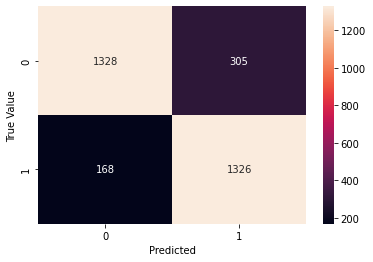

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True Value')

In [25]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1633
           1       0.81      0.89      0.85      1494

    accuracy                           0.85      3127
   macro avg       0.85      0.85      0.85      3127
weighted avg       0.85      0.85      0.85      3127

